Sentiment analysis with tweets

Data source: https://www.kaggle.com/kazanova/sentiment140/data

Columns:

    target: The class label - negative(0), positive(4)
    
    ids: The id of the tweet

    date: The date of the tweet

    flag: The query

    user: The user that tweeted

    text: The tweet

Number of instances: 4000



Collect Tweets using TWARC (command line tool).



Hydrate tweets from their corresponding ids:


> **twarc hydrate ids.txt > tweets.json**

Search for tweets using keywords:

> **twarc search covid19 > tweets.json**


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter 
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

Import file

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["sentiment_analysis.csv"]))
data.head(10)

Saving sentiment_analysis.csv to sentiment_analysis.csv


,target,ids,date,flag,user,text
0,0,1.470000e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1.470000e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1.470000e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1.470000e+09,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1.470000e+09,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1.470000e+09,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


Remove usernames and URLs from tweets

In [ ]:
for i in range(len(data['text'])):
    data['text'][i] = " ".join([word for word in data['text'][i].split()
                                if 'http' not in word and '@' not in word])

data.head(10)

,target,ids,date,flag,user,text
0,0,1.470000e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got David..."
1,0,1.470000e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1.470000e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to sa...
3,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am ..."
5,0,1.470000e+09,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew
6,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"hey long time no see! Yes.. Rains a bit ,only ..."
8,0,1.470000e+09,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope they didn't have it
9,0,1.470000e+09,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que me muera ?


Removing Punctuations, Numbers, and Special Characters

[a-zA-Z] = Any single character in the range a-z or A-Z

 ^ = Start of line 
 
 $ = End of line


In [ ]:
data['text'] = data['text'].str.replace('[^a-zA-Z#]', ' ')
data['text'] = data['text'].str.replace('#', '')
data.head(10)

,target,ids,date,flag,user,text
0,0,1.470000e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww that s a bummer You shoulda got David...
1,0,1.470000e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can t update his Facebook by ...
2,0,1.470000e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sa...
3,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no it s not behaving at all i m mad why am ...
5,0,1.470000e+09,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew
6,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,hey long time no see Yes Rains a bit only ...
8,0,1.470000e+09,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,nope they didn t have it
9,0,1.470000e+09,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,que me muera


Tokenization

In [ ]:
data['text'] = data['text'].apply(lambda x: x.split())
data.head(10)

,target,ids,date,flag,user,text
0,0,1.470000e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[Awww, that, s, a, bummer, You, shoulda, got, ..."
1,0,1.470000e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[is, upset, that, he, can, t, update, his, Fac..."
2,0,1.470000e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[I, dived, many, times, for, the, ball, Manage..."
3,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[my, whole, body, feels, itchy, and, like, its..."
4,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[no, it, s, not, behaving, at, all, i, m, mad,..."
5,0,1.470000e+09,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,"[not, the, whole, crew]"
6,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,"[Need, a, hug]"
7,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"[hey, long, time, no, see, Yes, Rains, a, bit,..."
8,0,1.470000e+09,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,"[nope, they, didn, t, have, it]"
9,0,1.470000e+09,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,"[que, me, muera]"


Remove Stop Words

In [ ]:
import string
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
def process(text):
    # Check for punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
data['text'] = data['text'].apply(process)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,target,ids,date,flag,user,text
0,0,1.470000e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[third, shoulda, awww, got, david, day, carr, ..."
1,0,1.470000e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[upset, blah, update, today, might, texting, c..."
2,0,1.470000e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[bounds, managed, dived, ball, save, many, res..."
3,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[whole, itchy, body, like, feels, fire]"
4,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[mad, behaving, see]"
5,0,1.470000e+09,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,"[whole, crew]"
6,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,"[hug, need]"
7,0,1.470000e+09,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"[yes, fine, long, hey, rains, bit, thanks, lol..."
8,0,1.470000e+09,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,[nope]
9,0,1.470000e+09,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,"[muera, que]"


Stemming and Lemmatization

Text Normalization techniques
  
  “walking , walks” will be replaced by word ‘walk’

    from nltk.stem.snowball import SnowballStemmer


Data Visualization

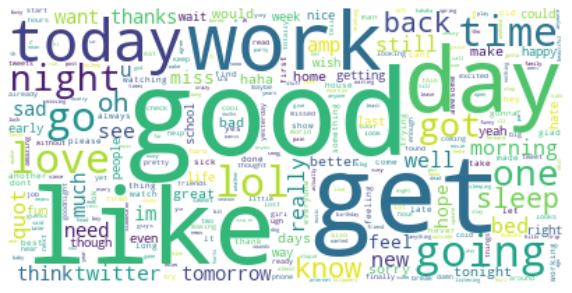

In [ ]:
# get individual words
words = []
for line in data['text']: 
 words.extend(line)
 
wordfreq = Counter(words)

wordcloud = WordCloud(
 background_color='white',
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Convert into a matrix of token counts

> term frequency — inverse document frequency or tf-idf

### K-Fold Cross Validation

![5-fold cross validation](https://drive.google.com/uc?id=1JW6NAig5vnebaBiNxacH8vnWQpWnbu1Z)


### Random Forest Classifier

![alt text](https://miro.medium.com/max/955/0*YEwFetXQGPB8aDFV)

(source: https://towardsdatascience.com/from-a-single-decision-tree-to-a-random-forest-b9523be65147)

Class is decided based on:


1.   Voting
2.   Weighted Voting
3.   Averaging
4.   Weighted Averaging

Hyperparameters:


*   Number of trees
*   Maximum depth of tree
*   Minimum number of samples
*   Maximum number of features
*   Bootstrap sampling

etc.





In [ ]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    return to_return  
       
data['text'] = data['text'].apply(string)
data.head()

,target,ids,date,flag,user,text
0,0,1.470000e+09,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,third shoulda awww got david day carr bummer
1,0,1.470000e+09,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset blah update today might texting cry resu...
2,0,1.470000e+09,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,bounds managed dived ball save many rest times go
3,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole itchy body like feels fire
4,0,1.470000e+09,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,mad behaving see


In [ ]:
Cv = KFold(n_splits=5, shuffle = True , random_state=10)

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

accuracyList = []

for train, test in Cv.split(data):
    x_train = data.text.iloc[train]
    y_train = data.target.iloc[train]
    x_test = data.text.iloc[test]
    y_test = data.target.iloc[test]

    x_train_counts = count_vect.fit_transform(x_train)
    x_train_tfidf = transformer.fit_transform(x_train_counts)
    
    x_test_counts = count_vect.transform(x_test)
    x_test_tfidf = transformer.transform(x_test_counts)


    model = RandomForestClassifier(n_estimators=500)
    model.fit(x_train_tfidf, y_train)
    predictions = model.predict(x_test_tfidf)
    confusionMat = confusion_matrix(y_test,predictions)
    
    accuracyList.append(accuracy_score(y_test,predictions)*100)

In [ ]:
accuracy = np.mean(accuracyList)
print(accuracy_list)
print('Accuracy: ' + str(accuracy))
print('Confusion Matrix:')
print(confusionMat)

Accuracy: 66.79177096370464
Confusion Matrix:
[[268 131]
 [132 268]]


### Hyperparameter Tuning

1.   Grid Search
2.   Random Search




In [ ]:
x_train, x_test, y_train, y_test =     train_test_split(data["text"], 
      data["target"], test_size = 0.2, random_state = 42)
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [50,75,100],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [50,100,200],
    #'min_samples_leaf': [1, 2, 4],
    #'min_samples_split': [2, 5, 10],
    #'random_state': [2,20,50,75],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(x_train_tfidf, y_train)

best_grid = grid_search.best_estimator_
predictions = best_grid.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, predictions)*100
best_param = best_grid.get_params()

print(accuracy)
print(best_param)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.1min finished


67.0
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
